Day 11 - Making a new simulation model (CIR) : Cox-Ingersoll-Ross, used for interest rates / volatility. Difference with the models before (OU/GBM) = process stays non negative (there is a squared term in the formula that makes it happen)

Feller condition check: 2*theta*kappa - sigma^2 = 0.0575
Feller condition satisfied (process should stay positive).

Running CIR simulation...
Simulation finished in 0.01s


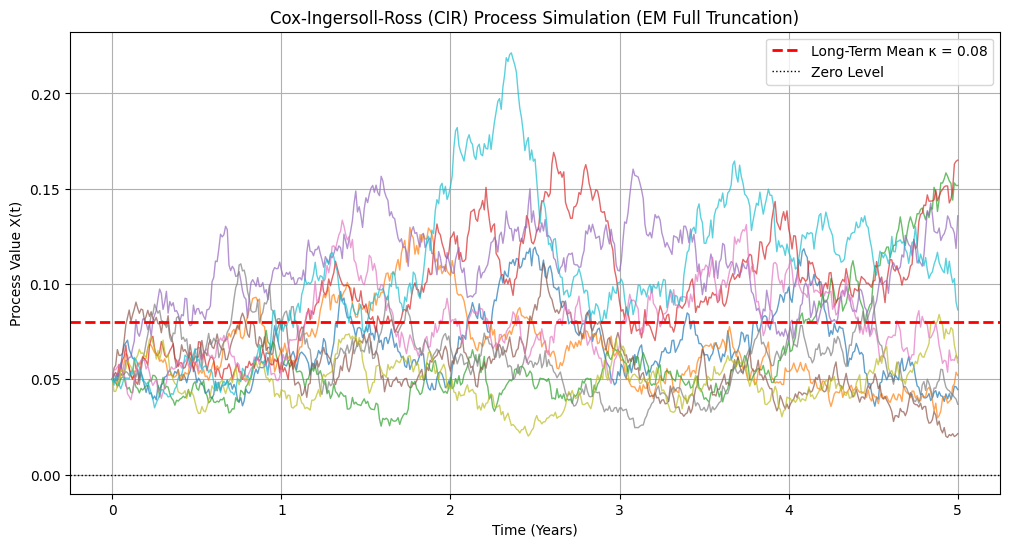


Minimum value reached across all paths: 0.019529


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time 

notebook_dir = os.path.dirname(os.path.abspath("__file__")) 
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

from sde_simulator.simulators import simulate_cir_em_vectorized

#choose parameters that satisfy Feller condition: 2*theta*kappa >= sigma^2
X0_CIR = 0.05      #initial value (e.g., 5% interest rate)
THETA_CIR = 0.5    #speed of reversion
KAPPA_CIR = 0.08   #long-term mean (e.g., 8%)
SIGMA_CIR = 0.15   #volatility parameter
T_CIR = 5.0        #time horizon (5 years)
DT_CIR = 0.01      #time step
NUM_PATHS_CIR = 10 #number of paths for visualization (less is more visible, so 10 here)

#check Feller condition
feller_cond = 2 * THETA_CIR * KAPPA_CIR - SIGMA_CIR**2
print(f"Feller condition check: 2*theta*kappa - sigma^2 = {feller_cond:.4f}")
if feller_cond >= 0:
    print("Feller condition satisfied (process should stay positive).")
else:
    print("Warning: Feller condition NOT satisfied (process might hit zero).")

#--- Run Simulation ---
print("\nRunning CIR simulation...")
start_time = time.time()
t_cir, X_cir_paths = simulate_cir_em_vectorized(
    X0_CIR, THETA_CIR, KAPPA_CIR, SIGMA_CIR, 
    T_CIR, DT_CIR, NUM_PATHS_CIR
)
end_time = time.time()
print(f"Simulation finished in {end_time - start_time:.2f}s")

#--- Plot Sample Paths ---
plt.figure(figsize=(12, 6))
plt.plot(t_cir, X_cir_paths[:, :NUM_PATHS_CIR], lw=1, alpha=0.7)
#highlight the mean level kappa
plt.axhline(KAPPA_CIR, color='red', linestyle='--', lw=2, label=f'Long-Term Mean κ = {KAPPA_CIR}')
#highlight zero level
plt.axhline(0, color='black', linestyle=':', lw=1, label='Zero Level')
plt.title(f'Cox-Ingersoll-Ross (CIR) Process Simulation (EM Full Truncation)')
plt.xlabel('Time (Years)')
plt.ylabel('Process Value X(t)')
plt.ylim(bottom=-0.01) #start y-axis slightly below zero to check positivity clearly
plt.legend()
plt.grid(True)
plt.show()

#print min value reached to check positivity
print(f"\nMinimum value reached across all paths: {np.min(X_cir_paths):.6f}")

Results are pretty accurate here, no negative values for the process value, and it goes towards the long term mean, all paths show that it tends towards that mean so its a pretty good sign. Volatility is also good, smaller when we go towards 0, while not the case when above the start price ! 